In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line Graph

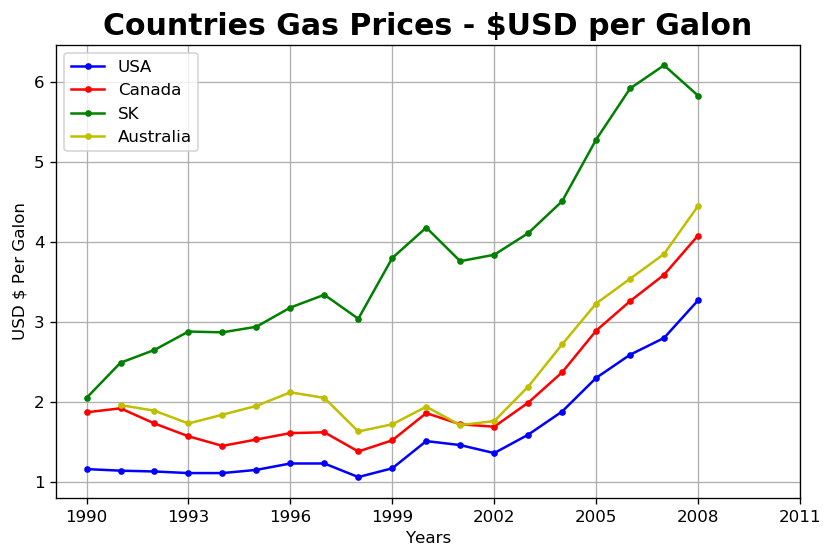

In [16]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5), dpi=120)

plt.title('Countries Gas Prices - $USD per Galon', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='USA')
plt.plot(gas.Year, gas.Canada, 'r.-', label="Canada")
plt.plot(gas.Year, gas['South Korea'], 'g.-', label="SK")
plt.plot(gas.Year, gas.Australia, 'y.-', label="Australia")
# Labels inherit from CSV headers if no labels specified here.

# Another way to plot many values in DF
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.xticks(gas.Year[::3].to_list()+[2011])
# List of years, adding 2011 to the end manually.

plt.xlabel('Years')

plt.ylabel('USD $ Per Galon')

plt.legend()
plt.savefig('gas_price_figure.png', dpi=300)
plt.grid()
plt.show()

## Load FIFA data

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fifa = pd.read_csv('fifa_data.csv')

In [18]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

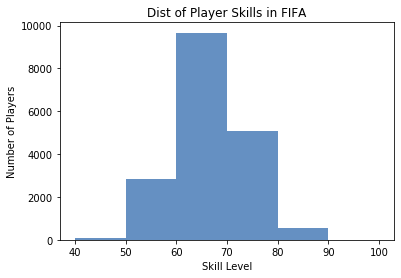

In [19]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#6590c2')

plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Dist of Player Skills in FIFA')

plt.xticks(bins)
plt.show()

### Pie Charts

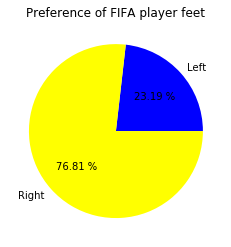

In [20]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colours = ['Blue', 'Yellow']

plt.pie([left,right], labels=labels, colors=colours, autopct='%.2f %%')
plt.title('Preference of FIFA player feet')
plt.show()

In [26]:
## Take 'lbs' off Weight, where those points appear
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight

## Make a Weight column in KG
#fifa["kg_weight"] = fifa["kg_weight"].astype(float) / 2.205



0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [27]:
# Define weight classes
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

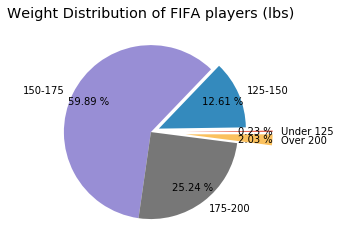

In [29]:
weights = [light, light_medium, medium, medium_heavy, heavy]
plt.style.use('ggplot')

explode = (.4,.1,0,0,.4)
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.title('Weight Distribution of FIFA players (lbs)')

plt.show()

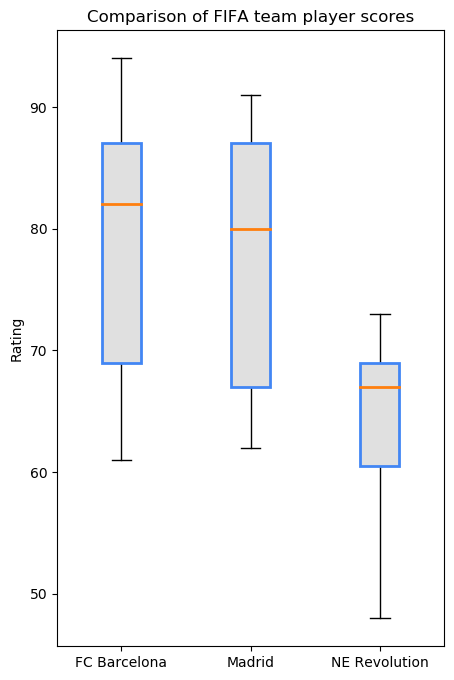

In [67]:
# lists out the Overall stat for each line that matches Club with FC Barcelona
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

plt.figure(figsize=(5,8))

labels = ['FC Barcelona','Madrid','NE Revolution']

plt.style.use('default')

#patch_artist needed to set box fill colours.
boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # set edge colour
    box.set(color='#4286f4', linewidth=2)
    
    # set fill colour
    box.set(facecolor='#e0e0e0')

plt.title('Comparison of FIFA team player scores')
plt.ylabel('Rating')

plt.show()